In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Csvs/crime.csv')

In [ ]:
# 2.1 Initial Exploration
print("Dataset Shape:", df.shape)
df.head()
df.info() # Check data types and missing values
df.describe() # Summary statistics

# 2.2 Data Cleaning
# Handle missing values. A simple strategy is to fill with 0 or the mean.
df.fillna(0, inplace=True)

# Check for and remove duplicates if any
df.drop_duplicates(inplace=True)
df.columns = df.columns.str.strip().str.upper().str.replace(' ', '_').str.replace('/', '_').str.replace('&', 'AND')
# print(df.columns)

# Standardize the text: convert to lowercase, then title case
df['STATE_UT'] = df['STATE_UT'].str.strip().str.title()

# Now, handle specific cases that title() doesn't fix correctly.
# For example, "A & N Islands" -> "A & N Islands", but we might want "Andaman & Nicobar Islands"
# This is a common manual mapping process.

# Create a dictionary to map incorrect variations to the correct, standard name
state_correction_map = {
    'A & N Islands': 'Andaman & Nicobar Islands',
    'A&N Islands': 'Andaman & Nicobar Islands', # if it exists
    'D & N Haveli': 'Dadra & Nagar Haveli',
    'D&N Haveli': 'Dadra & Nagar Haveli',
    'Delhi Ut': 'Delhi',
    'Nct Of Delhi': 'Delhi',
}

# Apply the mapping to fix specific cases
df['STATE_UT'] = df['STATE_UT'].replace(state_correction_map)

# Print the results to verify
print("\nAfter cleaning:")
print(df['STATE_UT'].nunique()) # This number should be LOWER now
df # The list should look much cleaner
# Verify cleanup
# print("Missing values after cleaning:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9840 entries, 0 to 9839
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE_UT                                             9840 non-null   object
 1   DISTRICT                                             9840 non-null   object
 2   YEAR                                                 9840 non-null   int64 
 3   MURDER                                               9840 non-null   int64 
 4   ATTEMPT_TO_MURDER                                    9840 non-null   int64 
 5   CULPABLE_HOMICIDE_NOT_AMOUNTING_TO_MURDER            9840 non-null   int64 
 6   RAPE                                                 9840 non-null   int64 
 7   CUSTODIAL_RAPE                                       9840 non-null   int64 
 8   OTHER_RAPE                                           9840 non-null   int64 
 9

,STATE_UT,DISTRICT,YEAR,MURDER,ATTEMPT_TO_MURDER,CULPABLE_HOMICIDE_NOT_AMOUNTING_TO_MURDER,RAPE,CUSTODIAL_RAPE,OTHER_RAPE,KIDNAPPING_AND_ABDUCTION,...,ARSON,HURT_GREVIOUS_HURT,DOWRY_DEATHS,ASSAULT_ON_WOMEN_WITH_INTENT_TO_OUTRAGE_HER_MODESTY,INSULT_TO_MODESTY_OF_WOMEN,CRUELTY_BY_HUSBAND_OR_HIS_RELATIVES,IMPORTATION_OF_GIRLS_FROM_FOREIGN_COUNTRIES,CAUSING_DEATH_BY_NEGLIGENCE,OTHER_IPC_CRIMES,TOTAL_IPC_CRIMES
0,Andhra Pradesh,ADILABAD,2013,96,72,13,61,0,61,65,...,30,2394,12,197,138,464,0,376,1390,6381
1,Andhra Pradesh,ANANTAPUR,2013,156,149,3,28,0,28,110,...,29,2537,23,337,43,161,0,573,1634,6913
2,Andhra Pradesh,CHITTOOR,2013,72,61,2,31,0,31,52,...,18,937,13,119,84,435,0,546,2239,5610
3,Andhra Pradesh,CUDDAPAH,2013,93,107,7,19,0,19,84,...,34,2310,9,318,163,207,0,464,1741,7048
4,Andhra Pradesh,CYBERABAD,2013,162,123,16,138,0,138,192,...,40,4284,43,350,338,1526,0,1104,3139,19992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9835,Delhi,WEST,2001,70,51,12,45,0,45,151,...,3,252,18,65,2,22,0,4,4151,7690
9836,Lakshadweep,LAKSHADWEEP,2001,1,0,0,0,0,0,0,...,2,3,0,0,0,0,0,0,17,36
9837,Lakshadweep,TOTAL,2001,1,0,0,0,0,0,0,...,2,3,0,0,0,0,0,0,17,36
9838,Puducherry,PONDICHERRY,2001,25,32,1,9,0,9,4,...,31,635,1,35,27,3,0,166,2324,4068


In [16]:
# Create a composite 'CRIMES_AGAINST_WOMEN' column for crimes against women
# List of columns related to crimes
women_crime_columns = [
    'RAPE',
    'KIDNAPPING_AND_ABDUCTION_OF_WOMEN_AND_GIRLS',
    'DOWRY_DEATHS',
    'ASSAULT_ON_WOMEN_WITH_INTENT_TO_OUTRAGE_HER_MODESTY',
    'INSULT_TO_MODESTY_OF_WOMEN',
    'CRUELTY_BY_HUSBAND_OR_HIS_RELATIVES'
]

# Sum the columns to create the new feature. Use .fillna(0) to avoid issues if any value is missing.
df['CRIMES_AGAINST_WOMEN'] = df[women_crime_columns].fillna(0).sum(axis=1)

# Handle missing values in critical columns
df['TOTAL_IPC_CRIMES'] = df['TOTAL_IPC_CRIMES'].fillna(0)
df['YEAR'] = df['YEAR'].fillna(0).astype(int) # Ensure year is integer

# Check the result
print(df[['STATE_UT', 'YEAR', 'TOTAL_IPC_CRIMES', 'CRIMES_AGAINST_WOMEN']].head())

         STATE_UT  YEAR  TOTAL_IPC_CRIMES  CRIMES_AGAINST_WOMEN
0  Andhra Pradesh  2013              6381                   919
1  Andhra Pradesh  2013              6913                   676
2  Andhra Pradesh  2013              5610                   709
3  Andhra Pradesh  2013              7048                   766
4  Andhra Pradesh  2013             19992                  2524


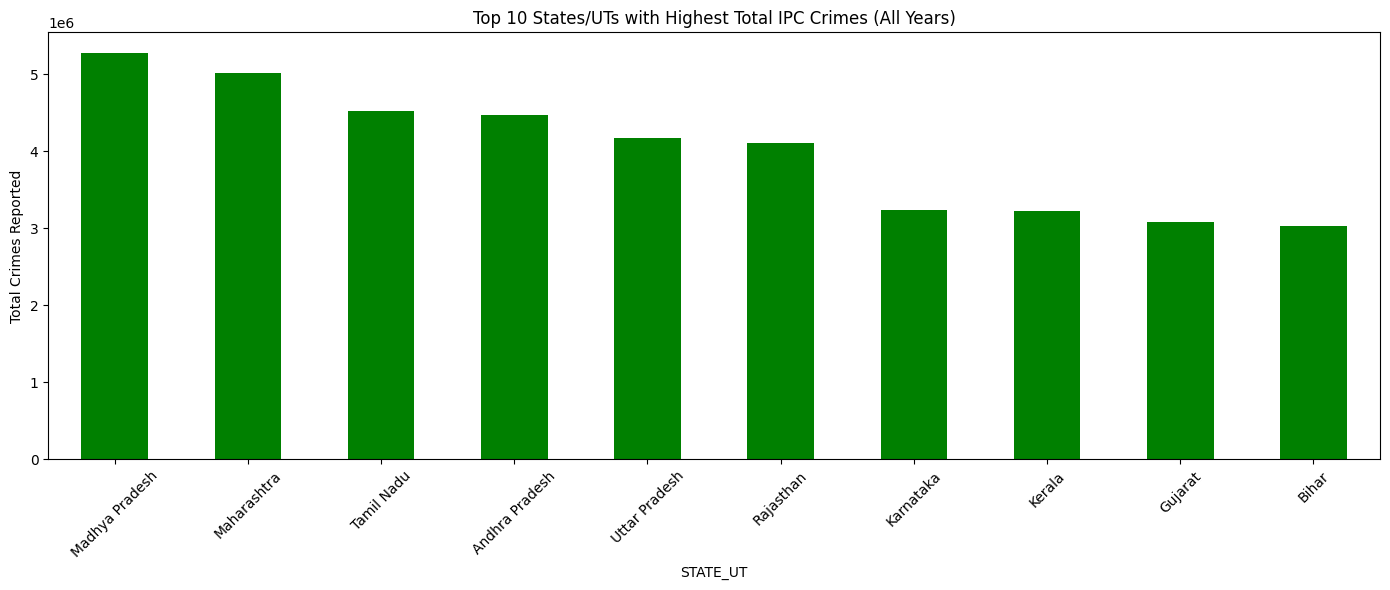

In [18]:
#Question 1
# Group by State and sum the total IPC crimes
statewise_total = df.groupby('STATE_UT')['TOTAL_IPC_CRIMES'].sum().sort_values(ascending=False)
# Plot the top 10
plt.figure(figsize=(14, 6))
statewise_total.head(10).plot(kind='bar', color='green')
plt.title('Top 10 States/UTs with Highest Total IPC Crimes (All Years)')
plt.ylabel('Total Crimes Reported')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

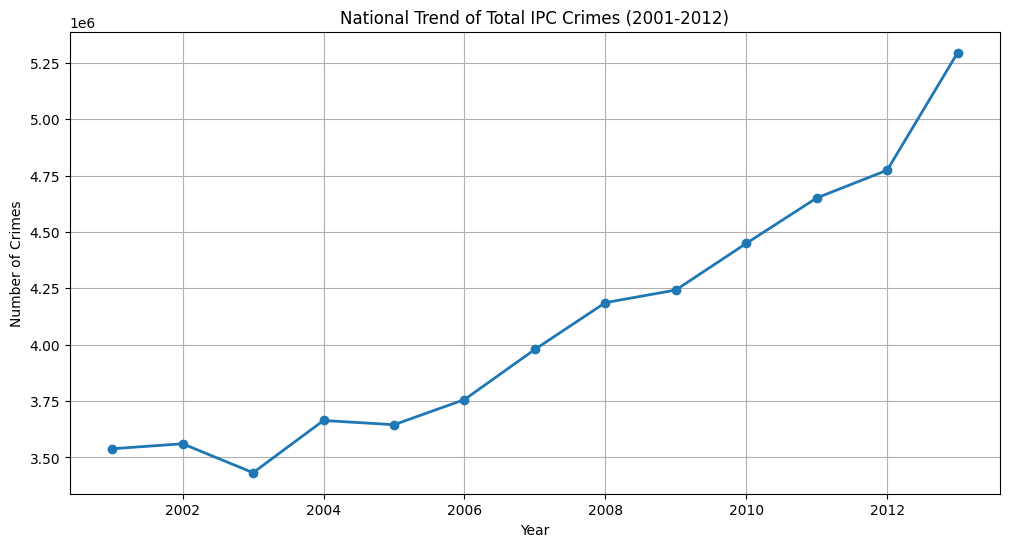

Overall % Change from 2001 to 2013: 54.29%


In [19]:
# Question 2: How have crimes changed from 2001 to 2012?
# Group by Year and sum the total IPC crimes
national_trend = df.groupby('YEAR')['TOTAL_IPC_CRIMES'].sum()
# Plot the trend line
plt.figure(figsize=(12, 6))
plt.plot(national_trend.index, national_trend.values, marker='o', linestyle='-', linewidth=2)
plt.title('National Trend of Total IPC Crimes (2001-2012)')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()
# Calculate overall percentage change
start = national_trend.min() # First year might not be 2001 if data is missing
end = national_trend.max()
pct_change = ((end - start) / start) * 100
print(f"Overall % Change from {national_trend.index[0]} to {national_trend.index[-1]}: {pct_change:.2f}%")

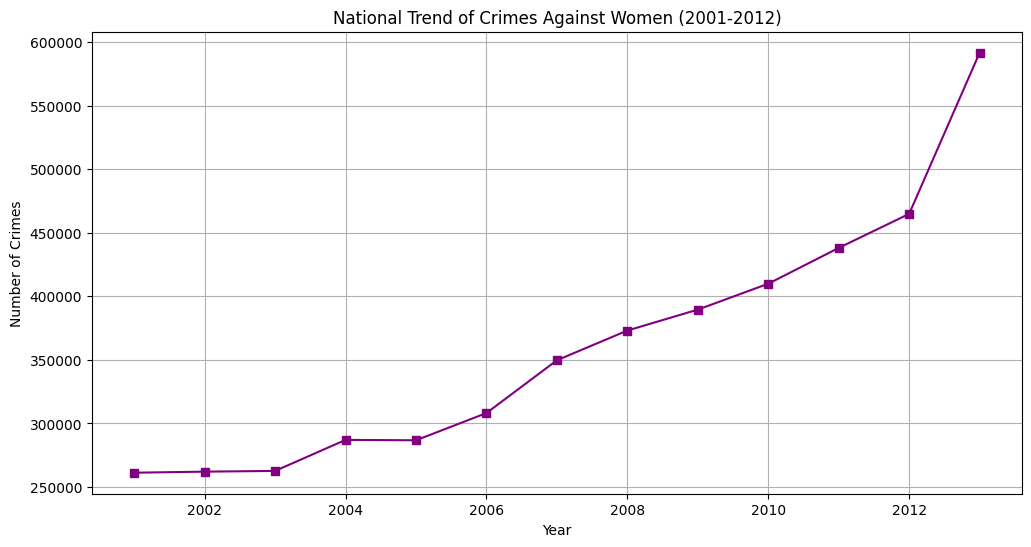

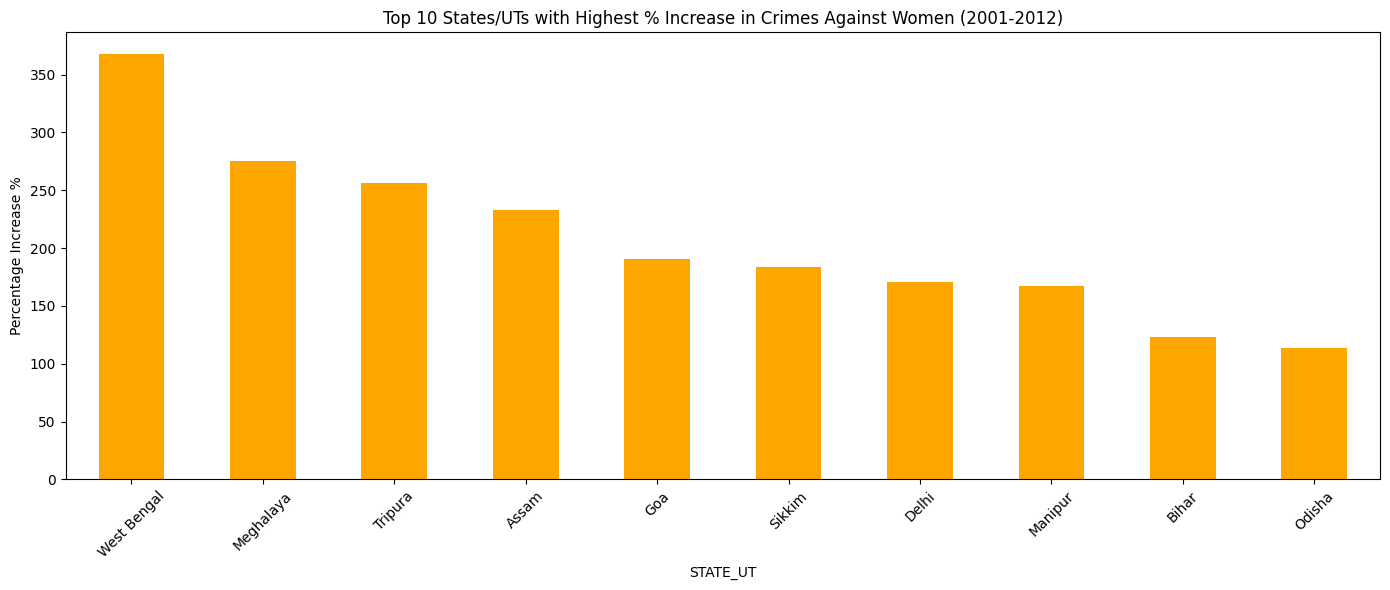

In [ ]:
# Question 3: Crimes against women, where are they rising?
# Part 1: National Trend for crimes against women
women_national_trend = df.groupby('YEAR')['CRIMES_AGAINST_WOMEN'].sum()
plt.figure(figsize=(12, 6))
plt.plot(women_national_trend.index, women_national_trend.values, marker='s', color='purple')
plt.title('National Trend of Crimes Against Women (2001-2012)')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

# Part 2: Find states with the highest percentage increase in crimes against women
pivot_df_women = df.pivot_table(index='STATE_UT', columns='YEAR', values='CRIMES_AGAINST_WOMEN', aggfunc='sum', fill_value=0)
start_year = 2001 # Assuming your data starts here
end_year = 2012   # Assuming your data ends here
pivot_df_women['PCT_CHANGE'] = ((pivot_df_women[end_year] - pivot_df_women[start_year]) / pivot_df_women[start_year]) * 100

rising_states_women = pivot_df_women['PCT_CHANGE'].replace([np.inf, -np.inf], np.nan).dropna().sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 6))
rising_states_women.plot(kind='bar', color='orange')
plt.title(f'Top 10 States/UTs with Highest % Increase in Crimes Against Women ({start_year}-{end_year})')
plt.ylabel('Percentage Increase %')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Total IPC Crime trend change: 54.29%


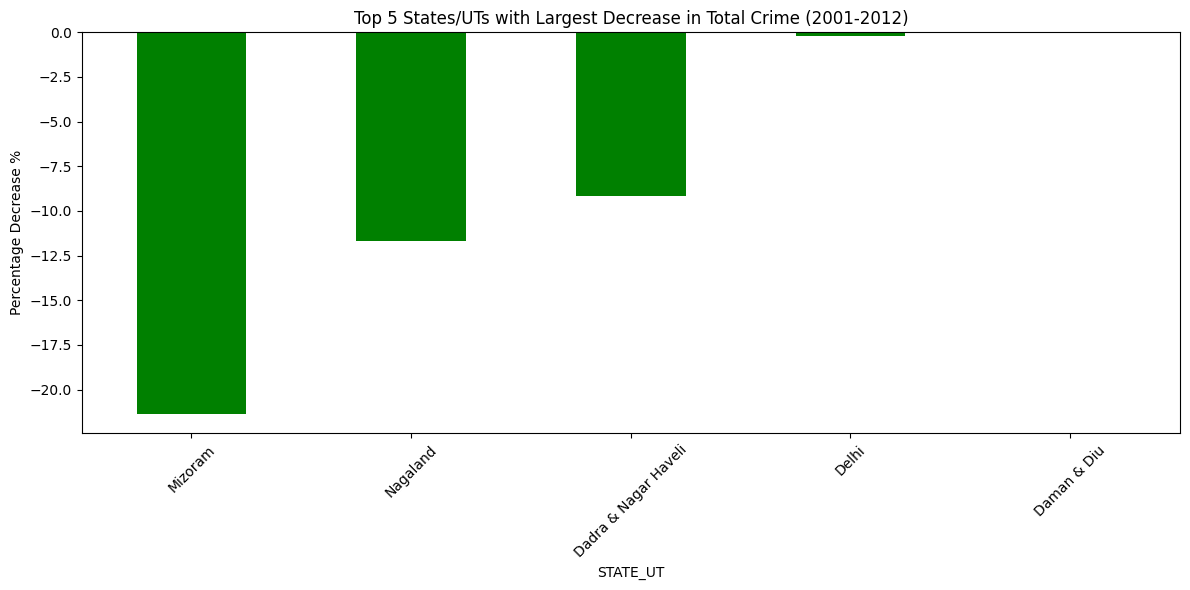

In [ ]:
# Question 4: Reuse the national trend from Q2
print(f"Total IPC Crime trend change: {pct_change:.2f}%") # From Question 2

# Find states with the biggest decrease in TOTAL IPC CRIMES
state_pivot = df.pivot_table(index='STATE_UT', columns='YEAR', values='TOTAL_IPC_CRIMES', aggfunc='sum', fill_value=0)
state_pivot['PCT_CHANGE'] = ((state_pivot[end_year] - state_pivot[start_year]) / state_pivot[start_year]) * 100

# Get the top 5 states with the largest decrease (most negative percentage)
decreasing_states = state_pivot['PCT_CHANGE'].replace([np.inf, -np.inf], np.nan).dropna().sort_values().head(5)

plt.figure(figsize=(12, 6))
decreasing_states.plot(kind='bar', color='green')
plt.title(f'Top 5 States/UTs with Largest Decrease in Total Crime ({start_year}-{end_year})')
plt.ylabel('Percentage Decrease %')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()